## Introduction

A Decision tree is a tree-like structure that represents a set of decisions and their possible consequences. Each node in the tree represents a decision, and each branch represents an outcome of that decision. The leaves of the tree represent the final decisions or predictions.

Decision trees are created by recursively partitioning the data into smaller and smaller subsets. At each partition, the data is split based on a specific feature, and the split is made in a way that maximizes the information gain.

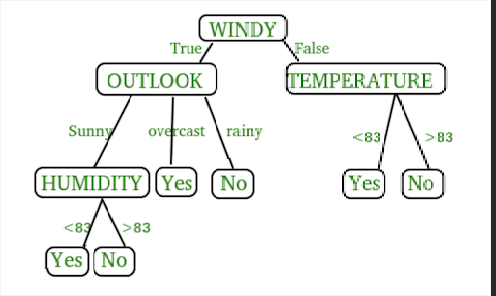

In the above figure, decision tree is a flowchart-like tree structure that is used to make decisions. It consists of Root Node(WINDY), Internal nodes(OUTLOOK, TEMPERATURE), which represent tests on attributes, and leaf nodes, which represent the final decisions. The branches of the tree represent the possible outcomes of the tests.



### Key Components of Decision Trees in Python
- Root Node: The decision tree's starting node, which stands for the complete dataset.
- Branch Nodes: Internal nodes that represent decision points, where the data is split based on a specific attribute.
- Leaf Nodes: Final categorization or prediction-representing terminal nodes.
- Decision Rules: Rules that govern the splitting of data at each branch node.
- Attribute Selection: The process of choosing the most informative attribute for each split.
- Splitting Criteria: Metrics like information gain, entropy, or the Gini Index are used to calculate the optimal split.

## Assumptions we make while using Decision tree
- At the beginning, we consider the whole training set as the root.
- Attributes are assumed to be categorical for information gain and for gini index, attributes are assumed to be continuous.
- On the basis of attribute values records are distributed recursively.
- We use statistical methods for ordering attributes as root or internal node.

### Decision Tree Algorithm
- The basic algorithm for building a decision tree is:
- Start with the entire dataset at the root node
- For each feature, calculate the information gain (or Gini impurity reduction)
- Select the feature with the highest information gain to split on
- Partition the data according to the selected feature's values
- Repeat steps 2-4 recursively for each child node until:
    - All instances in a node belong to the same class
    - No remaining features to split on
    - A predefined stopping condition is met (max depth, min samples per leaf, etc.)

### Key Concepts in Decision Trees

#### 1. Entropy
Entropy is a measure of impurity or uncertainty in a dataset. In the context of decision trees, it quantifies how mixed the classes are in a particular node.

Example: 
- If we have a binary classification with 50% positive and 50% negative examples -> Max entropy
- If all examples belong to one class --> 0 entropy

#### 2. Information Gain
Information gain is the reduction in entropy achieved by partitioning the data according to a particular feature. Decision trees use information gain to select which feature to split on at each step.

#### 3. Gini Impurity
An alternative to entropy is Gini impurity, which measures the probability of misclassifying a randomly chosen element if it were labeled randomly according to the class distribution.


## Random Forests
Random Forests are an ensemble method that builds multiple decision trees and combines their predictions to improve generalization and reduce overfitting.

#### Key understanding of Random Forests
1. Bagging (Bootstrap Aggregating)
    - Each tree in the forest is trained on a random subset of the training data (sampled with replacement)
    - This introduces diversity among the trees and reduces variance
2. Random Feature Selection
   - At each split, only a random subset of features is considered
3. Voting/Averaging Predictions
   - For classification: majority vote of all trees
   - For regression: average of all tree predictions

#### Hyperparameters in Random Forests
Key hyperparameters to tune:
- `n_estimators`: Number of trees in the forest
- `max_depth`: Maximum depth of each tree
- `min_samples_split`: Minimum number of samples required to split a node
- `min_samples_leaf`: Minimum number of samples required at a leaf node
- `max_features`: Number of features to consider when looking for the best split
- `bootstrap`: Whether bootstrap samples are used when building trees

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('/Users/gaganpuri/Documents/Broadway/Classification/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Basic preprocessing
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]  # Select features
df.dropna(inplace=True)  # Drop rows with missing Age

# Encode categorical variable
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male = 1, female = 0

# Split into features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Prediction
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# in streamlit UI, user should able to input the features - pessenger class, sib-sp count, parch, ...
# model load from persistant file
# transform
# predict
# display